In [469]:
import numpy as np
from scipy.stats import expon as exp_distrib
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy.integrate as integrate

In [470]:
# using seaborn for better rendering

import seaborn as sns
sns.reset_defaults()
sns.set(style='darkgrid', palette='colorblind')

## Disruption problem - MACS 207b

*Giraud Hippolyte, Guerrini Valerio, Sarotte Philippe*

### Introduction

Dans l'ensemble du projet, on étudie le processus $N$ défini de la façon suivante:

Soient $N_1$ et $N_2$ deux processus de Poisson indépendants d'intensités respectives $\lambda_1$ et $\lambda_2$.  
Initialement on observe seulement $N_1$ et après un instant aléatoire $\tau$ indépendant de $N_1$ et $N_2$, on observe $N_2$.

Le but est de déterminer $\tau$ à partir des observations d'une trajectoire de $N$. Pour ce faire, on étudie $\hat{Z}=\mathbb{E}[ \mathbb{1}_{\tau < t}| \mathcal{F}_t^N]$.  
$\hat{Z}$ correspond à l'estimation $Z$ sachant la trajectoire de $N$ jusqu'au temps t ou encore l'estimation de la fonction de répartition de $\tau$ sachant la trajectoire de $N$ jusqu'au temps t. On a montré que $\hat{Z}$ est solution de l'équation différentielle stochastique : 
$$\hat{Z}=\int_{0}^{t} h(s)(1-\hat{Z}(s))\,ds +\int_{0}^{t} \frac{(b-a)\hat{Z}(s^-)(1-\hat{Z}(s^-))}{\hat{\lambda}(s)}\,(dN(s)-\hat{\lambda}(s)ds) $$
Le fait que $\hat{Z}$ soit solution d'une équation différentielle est compréhensible. On sent bien que le changemnt de régime va reposer essentiellement sur les variations d'apparitions du processus N.  
De plus, on suppose que $\tau \sim \exp(\sigma)$. Donc $f(t)=\sigma e^{-\sigma t}$ et $1-F(t) = e^{-\sigma t}$,
on a ainsi $h(t)=\sigma$.

### 1. Étude de l'amplitude des sauts de $\hat{Z}$ et de sa dynamique entre les sauts

En dévoloppant $dN(s)$ on a :

$$\hat{Z}=\int_{0}^{t} \sigma(1-\hat{Z}(s))\,ds +\int_{0}^{t} (\lambda_2-\lambda_1)\hat{Z}(s^-)(1-\hat{Z}(s^-))\,ds + \sum_{T_k \leq t} \frac{(\lambda_2-\lambda_1)\hat{Z}(T_k^-)(1-\hat{Z}(T_k^-))}{\lambda_1+(\lambda_2-\lambda_1)\hat{Z}(T_k^-)}$$
Dès lors, la dynamique entre les sauts de N est donnée par : 
$$\hat{Z}(t)-\hat{Z}(T_{n-1})=\int_{T_{n-1}}^{t} (\sigma-(\lambda_2-\lambda_1)\hat{Z}(s))(1-\hat{Z}(s))\, ds$$

Ce qui signifie que sur l'intervalle $[T_{n-1},T_n[$, $\hat{Z}(t)$ suit l'équation différentielle:

$$
\begin{align*}
\dot{z}(t) &= (\sigma - (\lambda_2 - \lambda_1)z(t))(1-z(t)), \\
z(T_{n-1}) &= \hat{Z}(T_{n-1})
\end{align*}
$$

et l'amplitude du n-ième saut est donnée par : 
$$ \hat{Z}(T_n)-\hat{Z}(T_n^-)=\frac {(\lambda_2-\lambda_1)\hat{Z}(T_n^-)(1-\hat{Z}(T_n^-))}{\lambda_1+(\lambda_2-\lambda_1)\hat{Z}(T_n^-)} $$


#### Interprétation

Pour les prochaines interprétations on considère $\lambda_1 > \lambda_2$ et on pourra facilement utiliser le même raisonnement dans le cas inverse.
On considère que les périodes d'arrivées des processus sont négligeables devant le temps d'arrêt (de telle sorte à observer de nombreux points des deux processus). On peut donc supposer que $\sigma \ll \lambda_1, \lambda_2$

Essayons d'intuiter les variations de $\hat{Z}$ :

Bien sûr, $ 0 \leq \hat{Z(t)} \leq 1$ est positif et plus petit que 1.  
Puisque $\sigma \ll \lambda_1, \lambda_2$ et que $\lambda_1 > \lambda_2$ le terme dans l'intégrale décrivant la dynamique entre les sauts de N est positif et donc la trajectoire entre deux sauts sera croissante.   
C'est logique puisque plus on attend une arrivée et plus la probabilité que l'on soit entrain d'observer le processus d'intensité la plus basse augmente.  
La vitesse de croissance sera dépendant de la quantité $\lambda_2 - \lambda_1$.

Au contraire, puisque $\lambda_1 > \lambda_2$ un saut sera toujours négatif.

On peut alors se demander comment évolue globalement la fonction entre la décroissance lors d'un saut et la croissance entre deux sauts.  
On peut distinguer les deux cas extrêmes, en fonction de la différence d'intensités. 

De façon intuitive, plus la différence d'intensité entre les processus est grande plus il est simple de savoir l'instant auquel l'intensité a changé. Et en effet:

- Si $\lambda_2  \ll \lambda_1$, avant le changement de régime, les sauts auront une amplitude élevée qui fera redescendre $\hat{Z(t)}$ . En revanche dès que le régime 2 sera atteint, la croissance entre les sauts augmente alors que l'amplitude des sauts baisse. Ce qui fait que $\hat{Z}$ convergera vers 1.

- C'est lorsque $\lambda_2 ~ \lambda_1$ que la tâche se complique. En effet dans cette situation il est probable que sur une phase le régime 1 s'assimile au régime 2 et que cela fasse augmenter $\hat{Z}$. 

Pour avoir une interprétation moins mathématique, de l'allure et du fonctionnement de $\hat{Z}$: .

On peut comparer le processus à une succesion de lancers d'une pièce équilibrée jusqu'à un temps aléatoire $\tau$ ou la pièce deviendra biaisée et suivra une Bernoulli($\frac{3}{4}$).

Un processus de poisson étant le cas limite d'une Bernoulli, cette comparaison paraît sensée.
Plus les enchainements de piles seront long et/ou répétitifs, plus il est probable que le changement de régime ait déjà eu lieu.

L'aléatoire peut nous faire obtenir 6 piles de suite lors du premier régime, ce qui peut nous induire en erreur et nous faire croire que l'on est dans le deuxième régime, ce qui donnera un pic sur $\hat{Z}$ avamnt de retourner à l'équilibre. 

Lorsque le régime 2 sera atteint, la courbe augmentera pour de bon.

### 2. Simulation des trajectoires de $N$ et de $\hat{Z}$

#### a. Simulation de la trajectoire de $N$

On commence par simuler un processus de Poisson homogène d'intensité $\lambda$.  

Pour celà on simule des inter-arrivées $\xi_i \sim \exp(\lambda)$ i.i.d., les temps d'arrivées sont alors donnés par $T_n = \sum_{i=0}^{n} \xi_i$.  

Pour le critère d'arrêt, on décide d'utiliser un temps maximal à atteindre. Dans la suite, nous devrons être capables de changer d'intensité pour un temps $\tau$ donné, ce critère nous semble donc le plus pertinent.

In [471]:
def poisson_process(lamb,t_max):
    
    T=[0]
    t=0
    while t<=t_max:
        ksi = np.random.exponential(scale=1/lamb)
        t=T[-1] + ksi
        T.append(t)
        
    return T    

Nous simulons ci-dessous les arrivées d'un processus de Poisson homogène d'intensité $\lambda=\frac{1}{100}$.

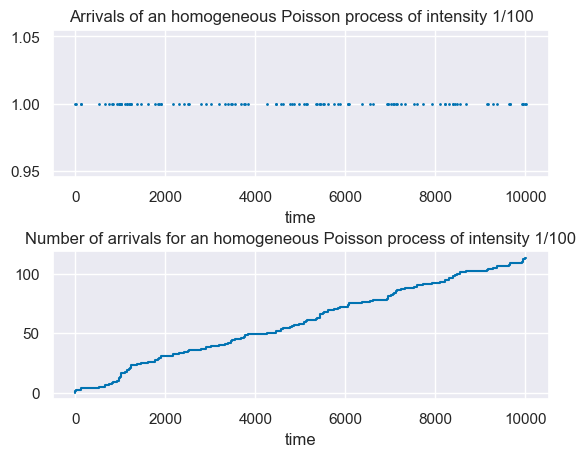

In [472]:
lamb=1/100

T=poisson_process(lamb,10000)
n=len(T)
ones=np.ones(n)
integers=np.arange(0,n)

fig,ax = plt.subplots(2,1)

ax[0].scatter(T,ones,s=1)
ax[0].set_title("Arrivals of an homogeneous Poisson process of intensity 1/100")
ax[0].set_xlabel("time")

ax[1].step(T,integers)
ax[1].set_title("Number of arrivals for an homogeneous Poisson process of intensity 1/100")
ax[1].set_xlabel("time")


plt.subplots_adjust(hspace=0.5)

plt.show()

On va maintenant passer à la simulation du processus $N$ défini de la façon suivante:  

Soient $N_1$ et $N_2$ deux processus de Poisson indépendants d'intensités respectives $\lambda_1$ et $\lambda_2$.  
Initialement on observe seulement $N_1$ et après un instant aléatoire $\tau$ indépendant de $N_1$ et $N_2$, on observe $N_2$.

La seule partie de la simulation qui peut paraître subtile est: comment gérer l'inter-arrivée entre le dernier point de $N_1$ et le premier point de $N_2$ ? 

En réalité, grâce à l'indépendance de $N_1$ et $N_2$, la première valeur de $N_2$ ne dépend pas de 
la dernière valeur de $N_1$.  
On peut donc arrêter le processus $N_1$ à la dernière valeur inférieure à $\tau$ et le concaténer avec le processus $\tilde{N_2}$, le translaté de $N_2$ par la quantité $\tau$. Puisque par convention, le premier terme de $N_2$ est 0 et donc le premier terme de $\tilde{N_2}$ est $\tau$, et qu'il n'y a aucune raison qu'il y ait un saut à $\tau$, on enlève le premier terme de $\tilde{N_2}$ lors de la concaténation.

In [473]:
def two_intensities_poisson_process(lamb_1,lamb_2,tau):
    N1=np.array(poisson_process(lamb_1, tau)[0:-1])
    
    
    """"on ne prend pas en compte la dernière arrivée de N1 puisqu'elle a dépassé tau.
        De plus, grâce à l'indépendance de N1 et N2, la première valeur de N2 ne dépend pas de 
        la dernière valeur de N1. 
        On peut donc considérer que le processus a pour valeur initiale tau,
        mais il faut enlever N2[0] au moment de la concaténation.
        """
    
    N2= tau + np.array(poisson_process(lamb_2, tau)[1:-1])
    
    T= np.concatenate((N1,N2))
    
    return T

Pour la suite on considérera que $ \tau \sim \exp(\sigma) $, avec $\sigma \ll \lambda_2 \ll \lambda_1$ afin d'avoir un nombre non négligeable d'arrivées pour les deux régimes et de pouvoir voir la différence entre les deux régimes à l'oeil nu.  
Dans la suite on prendra $\lambda_1=1$ , $\lambda_2=\frac{1}{10}$ et $\sigma=\frac{1}{1000}$.

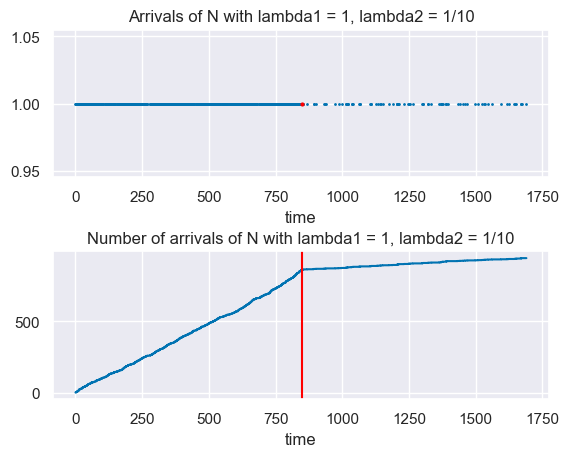

In [485]:
lamb_1= 1
lamb_2= 1/10
sigma = 1/1000

tau = np.random.exponential(scale=1/sigma)

T = two_intensities_poisson_process(lamb_1,lamb_2,tau)
n=len(T)
ones=np.ones(n)
integers=np.arange(0,n)

fig,ax = plt.subplots(2,1)

ax[0].scatter(T,ones,s=1)
ax[0].scatter(tau,1,s=4,color='red')
ax[0].set_title("Arrivals of N with lambda1 = 1, lambda2 = 1/10")
ax[0].set_xlabel("time")

ax[1].step(T,integers)
ax[1].axvline(tau, color= 'red', label='true tau')
ax[1].set_title("Number of arrivals of N with lambda1 = 1, lambda2 = 1/10")
ax[1].set_xlabel("time")


plt.subplots_adjust(hspace=0.5)

plt.show()


Sur ce graphique, on voit de façon évidente qu'après $\tau$ (representé en rouge sur le schéma) l'intensité du processus diminue. Cela se retranscrit notamment par un changement de la pente de $N(t)$.  
On aimerait être capables d'estimer $\tau$ uniquement à partir de la trajectoire de $N$.

Pour celà, nous allons tracer la trajectoire de $\hat{Z}$:

#### b. Simulation de la trajectoire de $\hat{Z}$

Nous avons montré précédemment que la trajectoire de $\hat{Z}$ était donnée par l'équation différentielle:

$$\hat{Z}=\int_{0}^{t} h(s)(1-\hat{Z}(s))\,ds +\int_{0}^{t} \frac{(b-a)\hat{Z}(s^-)(1-\hat{Z}(s^-))}{\hat{\lambda}(s)}\,(dN(s)-\hat{\lambda}(s)ds) $$

On commence par introduire les fonctions annexes dont on a besoin pour résoudre nos équations différentielles.  
On définit également la fonction qui nous permettra de résoudre les équations différentielles définissant les trajectoires entre les sauts.

In [475]:
def dydt(y,t,sigma,lamb_1,lamb_2):
    return (sigma-(lamb_2-lamb_1)*y)*(1-y)

def solve_equa_diff(t_min,t_max,y_0,sigma,lamb_1,lamb_2):
    #résout l'équation différentielle définissant les trajectoires entre les sauts
    t=np.linspace(t_min,t_max,endpoint=False)
    sol = odeint(dydt, y_0, t, args=(sigma, lamb_1, lamb_2)).reshape(-1)
    
    return(t,sol)                 

On définit maintenant la fonction renvoyant la trajectoire de $\hat{Z}$ à partir de $N$, on rappelle que l'amplitude des sauts est donnée par:

$$ \hat{Z}(T_n)-\hat{Z}(T_n^-)=\frac {(\lambda_2-\lambda_1)\hat{Z}(T_n^-)(1-\hat{Z}(T_n^-))}{\lambda_1+(\lambda_2-\lambda_1)\hat{Z}(T_n^-)} $$

In [486]:
def Z_estimate(T,sigma,lamb_1,lamb_2):
    Z_t=[0]
    times=np.array([])
    
    for i in range(len(T)-1):
        
        # on identifie la limite à gauche de Ti au dernier terme que l'on a calculé
        
        jump = ((lamb_2-lamb_1) * Z_t[-1] * (1 - Z_t[-1]))/(lamb_1 + (lamb_2-lamb_1) * Z_t[-1] )
        y_0 = Z_t[-1] + jump 
        
        # dans le cas particulier i=0, on a bien y_0=0
        
        t,sol=solve_equa_diff(T[i], T[i+1], y_0, sigma, lamb_1, lamb_2) 
                
        times = np.concatenate((times,t))
        Z_t = np.concatenate((Z_t,sol))
    
    #on a compté deux fois Z(0), on l'enlève donc à la fin
    
    return (times,Z_t[1:])

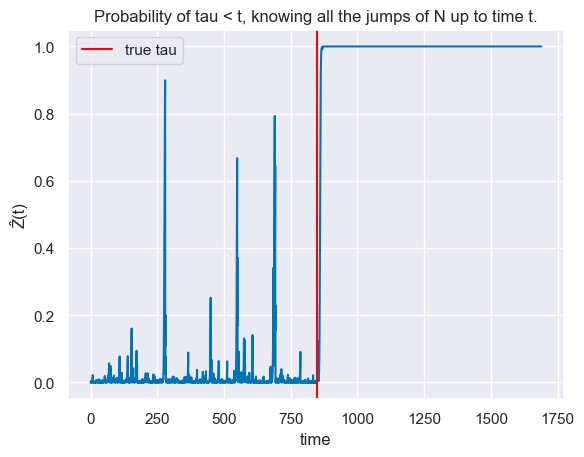

In [487]:
times,Z_t = Z_estimate(T,sigma,lamb_1,lamb_2)
plt.plot(times, Z_t)

plt.title("Probability of tau < t, knowing all the jumps of N up to time t.")
plt.xlabel("time")
plt.ylabel("Ẑ(t)")
plt.axvline(tau, color= 'red', label='true tau')
plt.legend()
plt.show()

On remarque que $\tau$ semble correspondre à l'origine du saut pour lequel $\hat{Z}(t)$ atteint 1.  
Il est important de rappeler que l'on a utilisé pour l'instant des fréquences de valeurs très eloignées l'une de l'autre, on peut donc se demander si en prenant des fréquences plus proches on obtient un résultat aussi flagrant.

#### Simulation pour des intensités moins éloignées:

Essayons de voir ce que cela donne pour $\lambda_1=1,5$ , $\lambda_2=0,5$ et $\sigma=\frac{1}{100}$ :

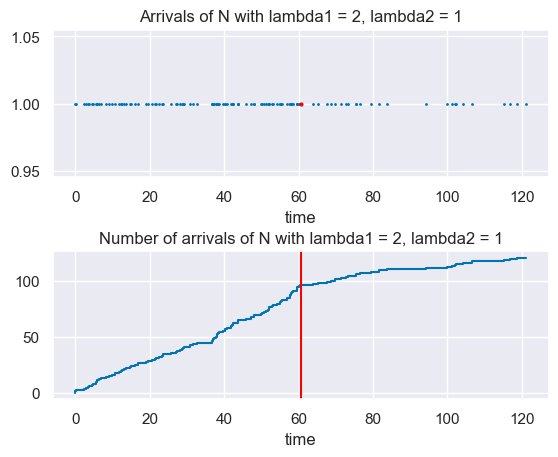

In [491]:
lamb_1= 1.5
lamb_2= 0.5
sigma = 1/100

tau = np.random.exponential(scale=1/sigma)

T = two_intensities_poisson_process(lamb_1,lamb_2,tau)
n=len(T)
ones=np.ones(n)
integers=np.arange(0,n)

fig,ax = plt.subplots(2,1)

ax[0].scatter(T,ones,s=1)
ax[0].scatter(tau,1,s=4,color='red')
ax[0].set_title("Arrivals of N with lambda1 = 2, lambda2 = 1")
ax[0].set_xlabel("time")

ax[1].step(T,integers)
ax[1].axvline(tau, color= 'red', label='true tau')
ax[1].set_title("Number of arrivals of N with lambda1 = 2, lambda2 = 1")
ax[1].set_xlabel("time")


plt.subplots_adjust(hspace=0.5)

plt.show()

Ici le changement de fréquence est bien moins flagrant que précédemment, mais on voit tout de même une légère différence.

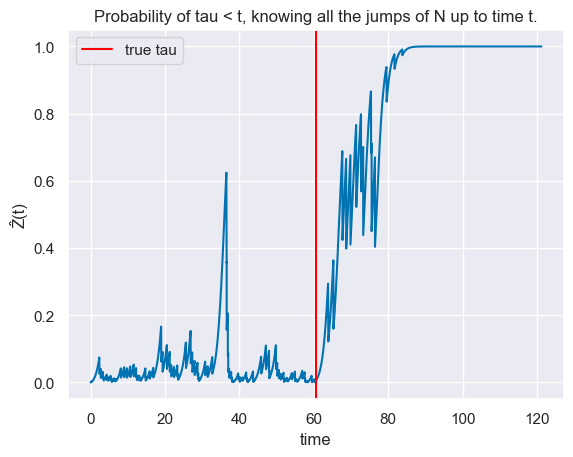

In [492]:
times,Z_t = Z_estimate(T,sigma,lamb_1,lamb_2)
plt.plot(times, Z_t)

plt.title("Probability of tau < t, knowing all the jumps of N up to time t.")
plt.xlabel("time")
plt.ylabel("Ẑ(t)")
plt.axvline(tau, color= 'red', label='true tau')
plt.legend()
plt.show()

On s'aperçoit que l'on n'a plus un énorme saut ressemblant à un Dirac mais que le saut est composé de nombreux sauts intermédiaires.  
Cependant, on s'aperçoit que dans ce cas de figure aussi, $\tau$ correspond à la dernière valeur proche de $0$ avant l'enchainement de sauts portant $\hat{Z}$ à $1$.  

On commence donc à avoir une idée du critère que l'on pourrait utiliser pour évaluer $\tau$.

### 3. Estimation de $\tau$

Sur toute les observation que l'on fait, on remarque que $\tau$ se situe juste avant la monté de $\hat{Z}$ vers 1.   
Une idée serait alors de prendre comme estimateur la valeur 'du pic final', qui serait un dirac si l'on considère que $\hat{Z}$ est l'observation réelle de $Z$.

Pour s'adapter à notre cas dans lequel le pic n'est pas un Dirac, on construit un estimateur de $\tau$ en considérant la dernière valeur précédant le pic final, inférieure à un seuil de tolérance proche de 0.

Cela est cohérent avec l'hypothèse qui vise à assimiler $\hat{Z}$ à l'observation réelle de $Z$:

$\tau$ est égale à la valeur en son dirac ~ valeur à la base du pic majeur.

In [493]:
# estimator of tau avec une tolérance 

def tau_est1(times, Zhat, tolerance):
    c = 0
    while (c < len(Zhat)) and (Zhat[c] < 1 - tolerance): #tant que Z ne vaut pas ~ 1 on avance 
        c = c+1
    if c == len(Zhat): #il est possible que Z ne vaille jamais ~ 1 sur des simulations peu probable, on les met à part et nous considérons leur quantiiés plus tard
        return -1
    while (c >= 0) and (Zhat[c] > tolerance): #dès que le pic à été attein, nous reculons pour trouver la première valeur de Z ~ 0
        c = c-1
    return times[c]

def relative_mean_error_1(intensity1, intensity2, sigma, tolerance, n): # on calcule l'erreur moyenne sur n simulations en regardant à côté la proportion ou le calcul n'a pas pu être fait
    l = []
    error_nb = 0
    for i in range(n):
        tau = np.random.exponential(scale=1/sigma)
        T = two_intensities_poisson_process(intensity1,intensity2,tau)
        times, Zhat = Z_estimate(T, sigma, intensity1, intensity2)
        tau_est = tau_est1(times, Zhat, tolerance)
        if tau_est != -1:
            l.append(abs(tau - tau_est1(times, Zhat, tolerance))/tau)
        else:
            error_nb = error_nb +1
    return sum(l)/len(l), error_nb/n

In [498]:
a, b = relative_mean_error_1(lamb_1, lamb_2, sigma, 0.1, 100)

print("Relative Mean error = " + str(a) + '\n')
print("Freq of non considération = " + str(b) + '\n')
print('Statistics made using a sample of size 100 and a tolerance of 0.1')

Relative Mean error = 0.10420323855939546

Freq of non considération = 0.13

Statistics made using a sample of size 100 and a tolerance of 0.1


On voit qu'en faisant le test sur de nombreuses trajectoires différentes, on obtient une erreur relative de l'estimation de $\tau$ autour de 0,1 avec cependant $ 13 $ % des échantillons pour lesquels notre estimation ne fonctionne pas (critère de tolérance trop petit, on pourrait l'augmenter mais on perdrait en précision).

### 4. Autres techniques possibles pour estimer $\tau$

Une idée que nous n'avons pas développée précedemment et qui s'aplliquerait peu importe la loi du processus serait de garder pour tau, la première valeur tel que $1/2 \leq \hat{Z(t)}$. Cela pourait s'assimiler à un raisonnement de Bayes, et s'applique à l'approximation de la fonction de répartition $\hat{Z}$. On propose une implémentation avec une étude de l'erreur :

In [499]:
def tau_estim_bayes(times, Zhat):
    c = 0
    while (c < len(Zhat)) and (Zhat[c] < 0.5):
        c = c+1
    if c == len(Zhat): # une fois de plus, il est possible que Z ne vaille jamais ~ 0.5 sur des simulations peu probable, on les met à part et nous considérons leur quantiiés plus tard
        return -1
    return times[c]

def relative_mean_error_bayes(intensity1, intensity2, sigma, n):
    l = []
    error_nb = 0
    for i in range(n):
        tau = np.random.exponential(scale=1/sigma)
        T = two_intensities_poisson_process(intensity1,intensity2,tau)
        times, Zhat = Z_estimate(T, sigma, intensity1, intensity2)
        tau_est = tau_estim_bayes(times, Zhat)
        if tau_est != -1:
            l.append(abs(tau - tau_estim_bayes(times, Zhat))/tau)
        else:
            error_nb = error_nb + 1
    return sum(l)/len(l), error_nb/n

In [500]:
a, b = relative_mean_error_bayes(lamb_1, lamb_2, sigma, 100)

print("Relative Mean error bayes = " + str(a) + '\n')
print("Freq of non considération = " + str(b) + '\n')
print('Statistics made using a sample of size 100 and a tolerance of 0.1')

Relative Mean error bayes = 0.3549844941999516

Freq of non considération = 0.11

Statistics made using a sample of size 100 and a tolerance of 0.1


On voit que la précision atteinte est bien moins élevée que précédemment.

Pour conclure sur des axes d'ouverture, nous n'avons pas développer ici l'usage de l'IA.

Compte tenu de la ressemblance des échantillons et l'accès infini à des données d'entraînement, il pourrait être intéressant d'utiliser différent algorithmes de machine learning (dont les réseaux de neuronnes) pour prédire la valeur de $\tau$.
